<a href="https://colab.research.google.com/github/oluwoleowoeye/food-price-analysis/blob/main/Visualization_and_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving 2.c.1_food prices anomalies indicator.xlsx to 2.c.1_food prices anomalies indicator.xlsx


In [2]:
!pip install openpyxl seaborn matplotlib


In [3]:
import pandas as pd

# Load the Excel file
file = '2.c.1_food prices anomalies indicator.xlsx'
excel_data = pd.ExcelFile(file)

# Check sheet names
print(excel_data.sheet_names)

# Load the correct sheet
df = excel_data.parse('Goal2')
df.head()


['Goal2']


,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,BasePeriod,Source,GeoInfoUrl,FootNote,Nature,Observation Status,Reporting Type,Severity of price levels,Type of product,Units
0,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",4,Afghanistan,2010,-0.12,2010,...,NaN,FAOSTAT Data/ Consumer Price Indices: http://w...,NaN,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,NaN,NaN,INDEX
1,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",4,Afghanistan,2011,-0.17,2011,...,NaN,FAOSTAT Data/ Consumer Price Indices: http://w...,NaN,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,NaN,NaN,INDEX
2,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",4,Afghanistan,2012,-0.28,2012,...,NaN,FAOSTAT Data/ Consumer Price Indices: http://w...,NaN,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,NaN,NaN,INDEX
3,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",4,Afghanistan,2013,0.30,2013,...,NaN,FAOSTAT Data/ Consumer Price Indices: http://w...,NaN,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,NaN,NaN,INDEX
4,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",4,Afghanistan,2014,0.42,2014,...,NaN,FAOSTAT Data/ Consumer Price Indices: http://w...,NaN,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,NaN,NaN,INDEX


In [4]:
# Select relevant columns
df_viz = df[['GeoAreaName', 'TimePeriod', 'Value']].dropna()
df_viz.rename(columns={'GeoAreaName': 'Country', 'TimePeriod': 'Year', 'Value': 'IFPA'}, inplace=True)


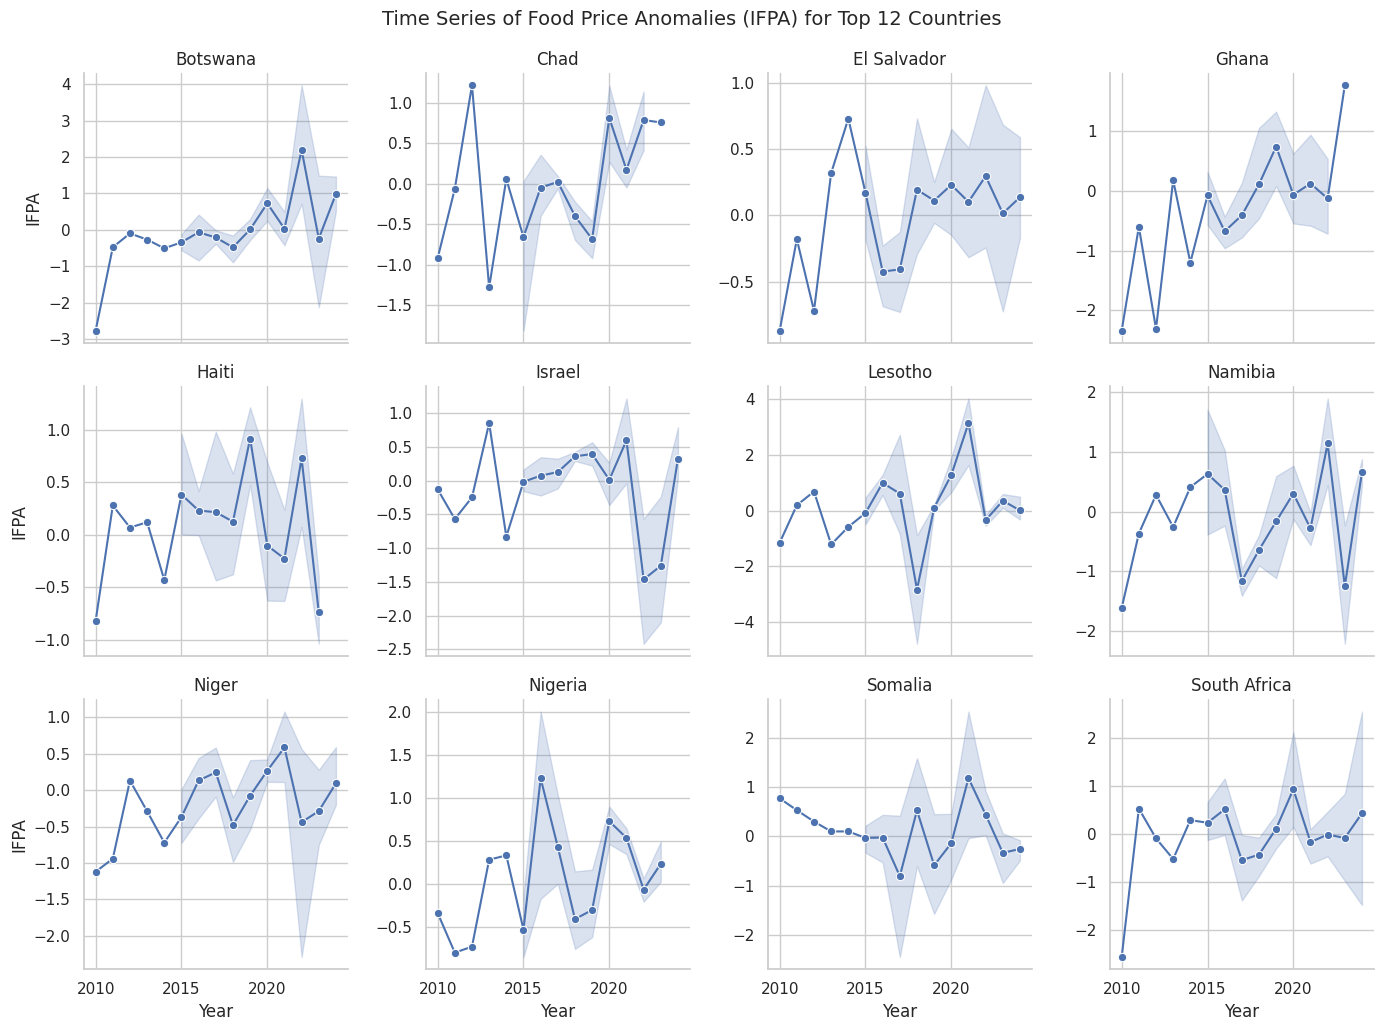

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 12 countries by data points
top_countries = df_viz['Country'].value_counts().head(12).index
df_top = df_viz[df_viz['Country'].isin(top_countries)]

# Plotting
sns.set(style="whitegrid")
g = sns.FacetGrid(df_top, col="Country", col_wrap=4, height=3.5, sharey=False)
g.map_dataframe(sns.lineplot, x="Year", y="IFPA", marker="o")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Year", "IFPA")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Time Series of Food Price Anomalies (IFPA) for Top 12 Countries", fontsize=14)
plt.show()


In [6]:
# Flag anomalies where IFPA >= 1
anomalies = df_viz[df_viz["IFPA"] >= 1]
anomalies_sorted = anomalies.sort_values(by="IFPA", ascending=False)
anomalies_sorted.head()


,Country,Year,IFPA
5304,Northern America,2022,100.0
5306,Northern America,2022,100.0
5734,Europe and Northern America,2022,82.6
5618,Europe,2022,81.0
5619,Europe,2023,81.0
